### Importing Modules

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [49]:
#Reading dataset using pandas

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Data Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

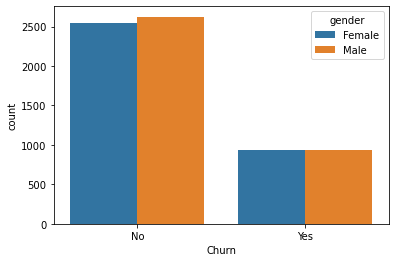

In [52]:
sns.countplot(x = 'Churn', data = df, hue = 'gender')

<AxesSubplot:xlabel='Churn', ylabel='count'>

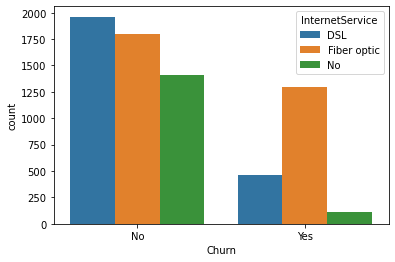

In [53]:
sns.countplot(x = 'Churn', data = df, hue = 'InternetService')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

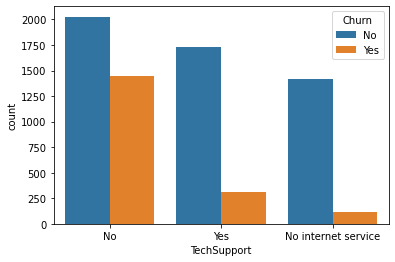

In [54]:
sns.countplot(x = 'TechSupport',data = df, hue = 'Churn')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

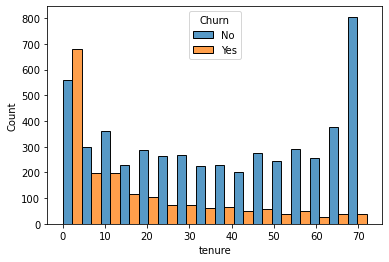

In [55]:
sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple = 'dodge')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

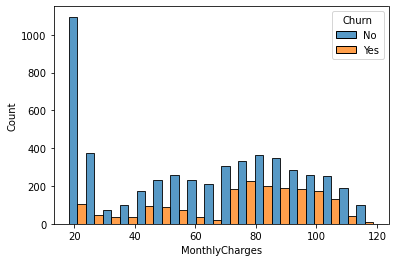

In [56]:
sns.histplot(x = 'MonthlyCharges',hue = 'Churn',data = df,multiple = 'dodge')

### Converting categorical values into numerical values

In [57]:
df['gender'] = df['gender'].replace({'Female':0, 'Male':1})
df['Partner'] = df['Partner'].replace({'Yes':1, 'No':0})

In [58]:
df['Dependents'] = df['Dependents'].replace({'Yes':1, 'No':0})

In [59]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [60]:
df['PhoneService'] = df['PhoneService'].replace({'Yes':1, 'No':0})

In [61]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [62]:
df['MultipleLines'] = df['MultipleLines'].replace({'Yes':1, 'No':0, 'No phone service':2})

In [63]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [64]:
df['InternetService'] = df['InternetService'].replace({'Fiber optic':0, 'DSL':1, 'No':2})

In [65]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [66]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes':1, 'No internet service':2, 'No':0})

In [67]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [68]:
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes':1, 'No internet service':2, 'No':0})

In [69]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [70]:
df['TechSupport'] = df['TechSupport'].replace({'Yes':1, 'No internet service':2, 'No':0})

In [71]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [72]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [73]:
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes':1, 'No internet service':2, 'No':0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes':1, 'No internet service':2, 'No':0})

In [74]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [75]:
df['Contract'] = df['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two year':2})

In [76]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [77]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes':1, 'No':0})

In [78]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [79]:
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [80]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [81]:
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

In [82]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [83]:
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes':1, 'No':0, 'No internet service':2})

In [84]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [85]:
df.drop(columns = ['customerID'], axis = 1, inplace = True)

In [86]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [87]:
print(df.OnlineBackup.value_counts())
print('---')
print(df.gender.value_counts())
print('---')
print(df.Partner.value_counts())
print('---')
print(df.Dependents.value_counts())
print('---')
print(df.tenure.value_counts())
print('---')
print(df.PhoneService.value_counts())
print('---')
print(df.MultipleLines.value_counts())
print('---')
print(df.InternetService.value_counts())
print('---')
print(df.OnlineSecurity.value_counts())
print('---')
print(df.OnlineBackup.value_counts())
print('---')
print(df.DeviceProtection.value_counts())
print('---')
print(df.TechSupport.value_counts())
print('---')
print(df.StreamingMovies.value_counts())
print('---')
print(df.StreamingTV.value_counts())
print('---')
print(df.Contract.value_counts())
print('---')
print(df.PaperlessBilling.value_counts())
print('---')
print(df.PaymentMethod.value_counts())
print('---')
print(df.MonthlyCharges.value_counts())
print('---')
print(df.TotalCharges.value_counts())
print('---')
print(df.Churn.value_counts())

0    3088
1    2429
2    1526
Name: OnlineBackup, dtype: int64
---
1    3555
0    3488
Name: gender, dtype: int64
---
0    3641
1    3402
Name: Partner, dtype: int64
---
0    4933
1    2110
Name: Dependents, dtype: int64
---
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---
1    6361
0     682
Name: PhoneService, dtype: int64
---
0    3390
1    2971
2     682
Name: MultipleLines, dtype: int64
---
0    3096
1    2421
2    1526
Name: InternetService, dtype: int64
---
0    3498
1    2019
2    1526
Name: OnlineSecurity, dtype: int64
---
0    3088
1    2429
2    1526
Name: OnlineBackup, dtype: int64
---
0    3095
1    2422
2    1526
Name: DeviceProtection, dtype: int64
---
0    3473
1    2044
2    1526
Name: TechSupport, dtype: int64
---
0    2785
1    2732
2    1526
Name: StreamingMovies, dtype: int64
---
0    2810
1    2707
2    1526
Name: StreamingTV, dtype: int64
---
0    3875
2    169

### Training Model

In [88]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
X = df[features]
y = df['Churn']

test_X = df

In [89]:
X.shape, y.shape, test_X.shape

((7043, 19), (7043,), (7043, 20))

In [90]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,0,0,0,0,8,1,1,0,0,0,1,0,1,1,0,1,0,99.65,820.5,1
6,1,0,0,1,22,1,1,0,0,1,0,0,1,0,0,1,3,89.10,1949.4,0
7,0,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,1,29.75,301.9,0
8,0,0,1,0,28,1,1,0,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0
